<a href="https://colab.research.google.com/github/aashish-chaubey/ds_fundamentals/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [146]:
data = '/content/train.csv'
test = '/content/test.csv'

In [147]:
df = pd.read_csv(filepath_or_buffer=data)
test_df = pd.read_csv(filepath_or_buffer=test)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [149]:
df[['Survived', 'Pclass']] = df[['Survived', 'Pclass']].astype('object')
test_df[['Pclass']] = test_df[['Pclass']].astype('object')

In [150]:
mapper = {1: 'Upper', 2: 'Middle', 3: 'Lower'}
df['Pclass'] = df['Pclass'].replace(mapper)
test_df['Pclass'] = test_df['Pclass'].replace(mapper)

In [151]:
df = pd.concat([df.drop('Sex', axis=1), pd.get_dummies(df['Sex'])], axis=1)
test_df = pd.concat([test_df.drop('Sex', axis=1), pd.get_dummies(test_df['Sex'])], axis=1)

In [152]:
df = pd.concat([df.drop('Pclass', axis=1), pd.get_dummies(df['Pclass'])], axis=1)
test_df = pd.concat([test_df.drop('Pclass', axis=1), pd.get_dummies(test_df['Pclass'])], axis=1)

In [153]:
x = df[(df['Upper'] == 1) & (df['Embarked'] == 'C')]

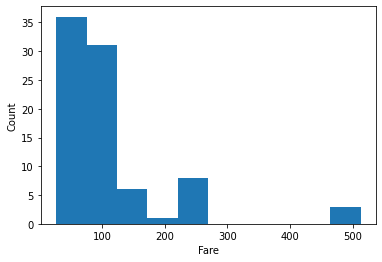

In [17]:
plt.hist(x['Fare'])
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

In [18]:
df.groupby("Embarked").describe()

Age                                     ... Upper                    
          count       mean        std   min    25%  ...   min  25%  50%  75%  max
Embarked                                            ...                          
C         130.0  30.814769  15.434860  0.42  21.25  ...   0.0  0.0  1.0  1.0  1.0
Q          28.0  28.089286  16.915396  2.00  17.50  ...   0.0  0.0  0.0  0.0  1.0
S         554.0  29.445397  14.143192  0.67  21.00  ...   0.0  0.0  0.0  0.0  1.0

[3 rows x 72 columns]

In [154]:
df['Embarked'] = df['Embarked'].fillna('C')

df = pd.concat([df.drop('Embarked', axis=1), pd.get_dummies(df['Embarked'], prefix='Embarked')], axis=1)
test_df = pd.concat([test_df.drop('Embarked', axis=1), pd.get_dummies(test_df['Embarked'], prefix='Embarked')], axis=1)

In [21]:
df[['Age', 'SibSp', 'Parch']][(df['SibSp'] == 1) & (df['Parch'] == 2) & (~df['Age'].isnull())].describe()

,Age,SibSp,Parch
count,17.000000,17.0,17.0
mean,20.465882,1.0,2.0
std,14.797290,0.0,0.0
min,0.920000,1.0,2.0
25%,5.000000,1.0,2.0
50%,24.000000,1.0,2.0
75%,33.000000,1.0,2.0
max,48.000000,1.0,2.0


In [155]:
df.loc[df['Age'].isnull() & df['Name'].str.contains('Master'), 'Age'] = df.loc[df['Age'].isnull() & df['Name'].str.contains('Master'), 'Age'].fillna(5)
df.loc[df['Age'].isnull() & df['Name'].str.contains('Mr'), 'Age'] = df.loc[df['Age'].isnull() & df['Name'].str.contains('Mr'), 'Age'].fillna(33)
df.loc[df['Age'].isnull() & df['Name'].str.contains('Miss') & (df['SibSp'] > 1), 'Age'] = df.loc[df['Age'].isnull() & df['Name'].str.contains('Miss') & (df['SibSp'] > 1), 'Age'].fillna(10)
df.loc[df['Age'].isnull() & df['Name'].str.contains('Miss'), 'Age'] = df.loc[df['Age'].isnull() & df['Name'].str.contains('Miss'), 'Age'].fillna(23)
df.loc[df['Age'].isnull(), 'Age'] = df.loc[df['Age'].isnull(), 'Age'].fillna(33)

In [156]:
df = df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, errors='raise')
df.head()

,Survived,Age,SibSp,Parch,Fare,female,male,Lower,Middle,Upper,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,1,1,0,0
2,1,26.0,0,0,7.9250,1,0,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,0,0,0,1


In [157]:
mean = test_df["Age"].mean()
std = test_df["Age"].std()
is_null = test_df["Age"].isnull().sum()
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
test_df.loc[test_df['Age'].isnull(), 'Age'] = rand_age

test_df.loc[test_df['Fare'].isnull(), 'Fare'] = test_df.loc[test_df['Fare'].isnull(), 'Fare'].replace(np.nan, test_df['Fare'].mean())

In [158]:
passenger_id = test_df['PassengerId']
test_df = test_df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, errors='raise')
test_df.head()

,Age,SibSp,Parch,Fare,female,male,Lower,Middle,Upper,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,1,1,0,0,0,1,0
1,47.0,1,0,7.0000,1,0,1,0,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,0,1,1,0,0,0,0,1
4,22.0,1,1,12.2875,1,0,1,0,0,0,0,1


In [159]:
X = df.loc[:, [name for name in df.columns.values if name != "Survived"]].values
y = df.loc[:, ['Survived']].astype('int').values.ravel()

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [32]:
X = StandardScaler().fit_transform(X)

In [33]:
pca = PCA(n_components=8)
pca_X = pca.fit_transform(X)

In [34]:
pca.explained_variance_ratio_

array([0.22633718, 0.18316152, 0.16324585, 0.1232609 , 0.09243751,
       0.0770757 , 0.05618505, 0.04561971])

In [35]:
columns = ['pca_%i' % i for i in range(8)]
df_pca = pd.DataFrame(pca_X, columns=columns, index=df.index)
df_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7
0,-1.749536,0.095944,0.133422,0.797169,-0.093810,-0.360881,-0.459548,0.346133
1,3.691497,-0.429315,0.999736,-0.279992,0.052282,-0.675255,-0.033486,1.068974
2,-0.240494,1.490412,-0.072784,-0.932916,-1.293919,-1.267410,-0.191105,0.125725
3,2.009312,0.191486,-1.135887,-0.169631,-1.667606,-0.073954,-0.662458,0.813480
4,-1.689986,-0.607463,0.141852,0.232638,-0.603700,-0.476001,0.238892,-0.022811


## Making the models

In [60]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42).fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
clf.score(X, y)

0.8035914702581369

In [160]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, max_depth=5)

In [161]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [162]:
clf.score(X, y)

0.8473625140291807

In [4]:
test_df.loc[test_df['Age'].isnull() & test_df['Name'].str.contains('Master'), 'Age'] = test_df.loc[df['Age'].isnull() & test_df['Name'].str.contains('Master'), 'Age'].fillna(5)
test_df.loc[test_df['Age'].isnull() & test_df['Name'].str.contains('Mr'), 'Age'] = test_df.loc[df['Age'].isnull() & test_df['Name'].str.contains('Mr'), 'Age'].fillna(33)
test_df.loc[test_df['Age'].isnull() & test_df['Name'].str.contains('Miss') & (test_df['SibSp'] > 1), 'Age'] = test_df.loc[df['Age'].isnull() & df['Name'].str.contains('Miss') & (test_df['SibSp'] > 1), 'Age'].fillna(10)
test_df.loc[test_df['Age'].isnull() & test_df['Name'].str.contains('Miss'), 'Age'] = test_df.loc[df['Age'].isnull() & test_df['Name'].str.contains('Miss'), 'Age'].fillna(23)
test_df.loc[test_df['Age'].isnull(), 'Age'] = test_df.loc[test_df['Age'].isnull(), 'Age'].fillna(33)
test_df.loc[test_df['Fare'].isnull()] = test_df.loc[test_df['Fare'].isnull()].fillna(test_df[(test_df['Embarked'] == 'S') & (test_df['Pclass'] == 3)]['Fare'].mean())

In [29]:
test_df.loc[test_df['Fare'].isnull()]

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,Lower,Middle,Upper,Embarked_C,Embarked_Q,Embarked_S
152,1044,"Storey, Mr. Thomas",60.5,0,0,3701,NaN,NaN,0,1,1,0,0,0,0,1


In [5]:
test_df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True, errors='raise')

In [6]:
test_df = pd.concat([test_df.drop('Sex', axis=1), pd.get_dummies(test_df['Sex'])], axis=1)
mapper = {1: 'Upper', 2: 'Middle', 3: 'Lower'}
test_df['Pclass'] = test_df['Pclass'].replace(mapper)
test_df = pd.concat([test_df.drop('Pclass', axis=1), pd.get_dummies(test_df['Pclass'])], axis=1)
test_df = pd.concat([test_df.drop('Embarked', axis=1), pd.get_dummies(test_df['Embarked'], prefix='Embarked')], axis=1)

In [117]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        417 non-null    float64
 4   female      418 non-null    uint8  
 5   male        418 non-null    uint8  
 6   Lower       418 non-null    uint8  
 7   Middle      418 non-null    uint8  
 8   Upper       418 non-null    uint8  
 9   Embarked_C  418 non-null    uint8  
 10  Embarked_Q  418 non-null    uint8  
 11  Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 16.5 KB


In [7]:
test_X = test_df.loc[:, [name for name in test_df.columns.values if name != "Survived"]].values

In [10]:
test_X = StandardScaler().fit_transform(test_X)
pca = PCA(n_components=8)
pca_test_X = pca.fit_transform(test_X)

In [11]:
pca_test_X

array([[-1.17318138,  0.49620344, -2.73471872, ...,  1.95230587,
         0.1193002 ,  0.50740691],
       [-0.15779447,  1.6562579 ,  0.61567308, ..., -0.26812127,
        -0.28484491, -1.82148745],
       [-0.05559103, -1.02454776, -1.33761915, ...,  3.47246845,
         0.56987447, -0.8682729 ],
       ...,
       [-1.44660128, -0.6988362 , -0.39335552, ..., -0.24895702,
         0.32019177, -0.5948087 ],
       [-1.5661667 , -0.60799765, -0.36540023, ..., -0.39931645,
         0.22045687, -0.28497643],
       [ 0.14918126, -0.32600142, -1.68740999, ..., -0.12881785,
         0.39522085, -0.94986211]])

In [37]:
columns = ['pca_%i' % i for i in range(8)]
df_test_pca = pd.DataFrame(pca_test_X, columns=columns, index=test_df.index)
df_test_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7
0,-1.173181,0.496203,-2.734719,-0.557060,-0.413873,1.952306,0.119300,0.507407
1,-0.157794,1.656258,0.615673,0.015185,-1.307097,-0.268121,-0.284845,-1.821487
2,-0.055591,-1.024548,-1.337619,-2.649020,0.022908,3.472468,0.569874,-0.868273
3,-1.698683,-0.508595,-0.335465,0.527974,-0.692101,-0.564028,0.111636,0.051075
4,-0.603061,2.243197,1.021177,0.651868,-0.242855,-0.658978,-0.031618,-0.313996


In [163]:
predictions = clf.predict(test_df)

In [164]:
output = pd.DataFrame({'PassengerId': passenger_id, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

In [142]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        418 non-null    float64
 4   female      418 non-null    uint8  
 5   male        418 non-null    uint8  
 6   Lower       418 non-null    uint8  
 7   Middle      418 non-null    uint8  
 8   Upper       418 non-null    uint8  
 9   Embarked_C  418 non-null    uint8  
 10  Embarked_Q  418 non-null    uint8  
 11  Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 16.5 KB
